In [2]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import matplotlib.pyplot as plt
import thinkplot 
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

In [4]:
dfr=pd.read_csv("salaries-by-region.csv")
dfr.head(5)
dfr.dropna()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
5,Cal Poly San Luis Obispo,California,"$57,200.00","$101,000.00","$55,000.00","$74,700.00","$133,000.00","$178,000.00"
6,University of California at Los Angeles (UCLA),California,"$52,600.00","$101,000.00","$51,300.00","$72,500.00","$139,000.00","$193,000.00"
7,"University of California, San Diego (UCSD)",California,"$51,100.00","$101,000.00","$51,700.00","$75,400.00","$131,000.00","$177,000.00"
...,...,...,...,...,...,...,...,...
315,State University of New York (SUNY) at Potsdam,Northeastern,"$38,000.00","$70,300.00","$35,100.00","$51,200.00","$100,000.00","$179,000.00"
316,Niagara University,Northeastern,"$36,900.00","$69,700.00","$44,000.00","$57,000.00","$92,000.00","$128,000.00"
317,State University of New York (SUNY) at Fredonia,Northeastern,"$37,800.00","$66,200.00","$32,800.00","$44,200.00","$93,300.00","$181,000.00"
318,University of Southern Maine,Northeastern,"$39,400.00","$63,600.00","$40,400.00","$47,900.00","$85,700.00","$117,000.00"


In [5]:
dfr.describe()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,320,320,320,320,273,320,320,273
unique,320,5,168,204,166,217,130,115
top,Stanford University,Northeastern,"$42,600.00","$72,100.00","$43,300.00","$60,700.00","$117,000.00","$150,000.00"
freq,1,100,6,5,5,5,10,10


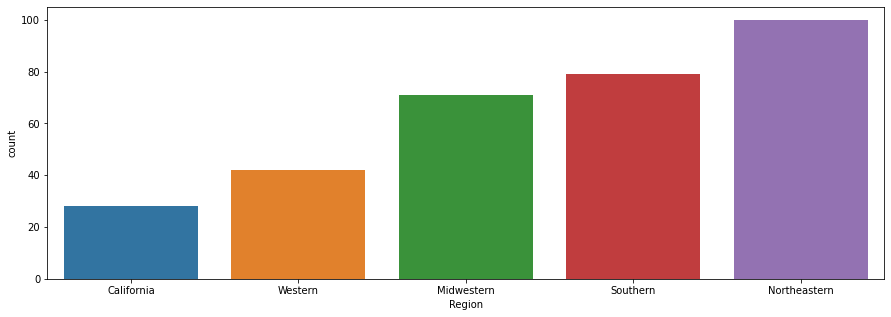

In [6]:
sns.countplot(x = "Region", data =dfr)
plt.show()

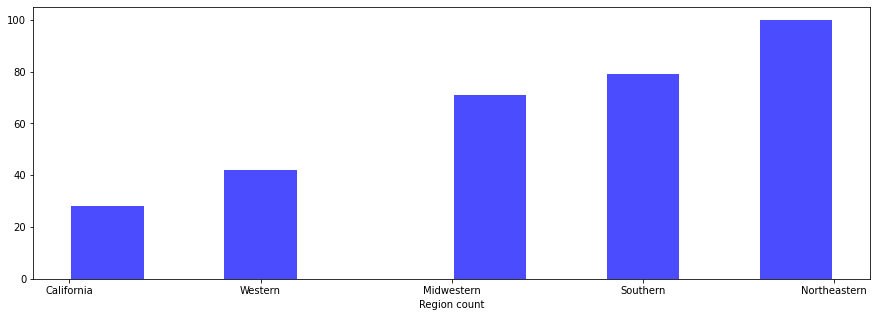

In [7]:
#Distribution of Loan Amounts

n, bins, patches = plt.hist(x = dfr["Region"], bins ="auto", color = "blue", alpha = 0.7, rwidth = 0.95)
plt.xlabel("Region count")
plt.show()

In [8]:
dfr.head(2)

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN


In [13]:
dfr1=dfr["Starting Median Salary"]

<AxesSubplot:xlabel='Starting Median Salary', ylabel='Count'>

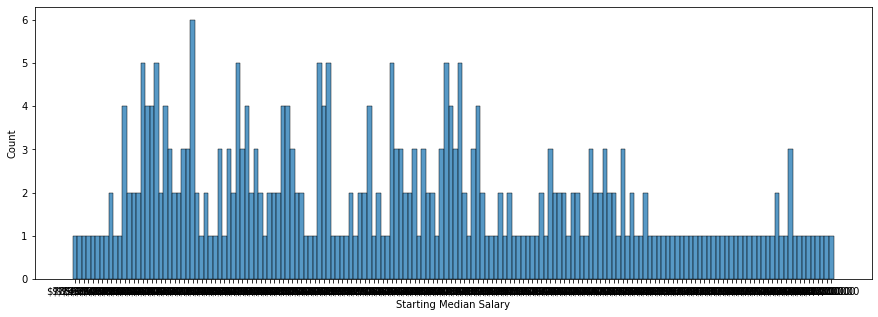

In [19]:
sns.histplot(dfr1)

In [21]:
dfr.head(2)

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN


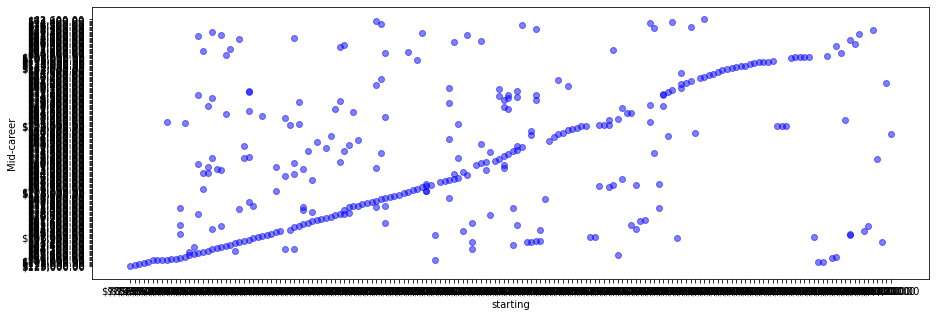

In [23]:
plt.scatter(dfr["Starting Median Salary"], dfr["Mid-Career Median Salary"], c = "blue", alpha = 0.5)
plt.xlabel("starting")
plt.ylabel("Mid-career")
plt.show()

In [24]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car,num_but_cat
cat_cols, num_cols, cat_but_car,num_but_cat =grab_col_names(dfr)

Observations: 320
Variables: 8
cat_cols: 1
num_cols: 0
cat_but_car: 7
num_but_cat: 0


In [25]:
num_but_cat
#Its the dependent variable so we're gonna ignore that.

[]

In [26]:
cat_cols

['Region']

In [27]:
num_cols

[]